<a href="https://colab.research.google.com/github/martin-fabbri/colab-notebooks/blob/master/statistical_thinking_in_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Statistical thinking in Python

## Exploratory Data Analysis

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from math import sqrt
from scipy import stats
sns.set()

In [0]:
iris = load_iris()
data = iris.data
target = iris.target

sentosa_samples = data[target == 0]
versicolor_samples = data[target == 1]
virginica_samples = data[target == 2]

setosa_petal_length = sentosa_samples[:,0]
versicolor_petal_length = versicolor_samples[:,0]
virginica_petal_length = virginica_samples[:,0]

setosa_petal_width = sentosa_samples[:,3]
versicolor_petal_width = versicolor_samples[:,3]
virginica_petal_width = virginica_samples[:,3]

iris_df = pd.DataFrame(data=np.c_[iris['data'], iris['target']], 
                       columns=iris['feature_names'] + ['target'])
iris_df.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0


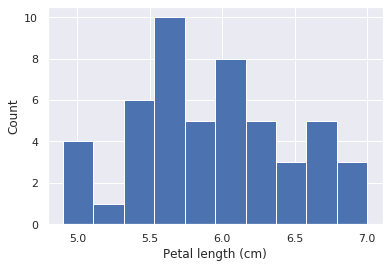

In [0]:
plt.xlabel('Petal length (cm)')
plt.ylabel('Count')
plt.hist(versicolor_petal_length);

In [0]:
n_data = len(versicolor_petal_length)
n_bins = int(sqrt(n_data))

print(f'Number on bins: {n_bins}')

Number on bins: 7


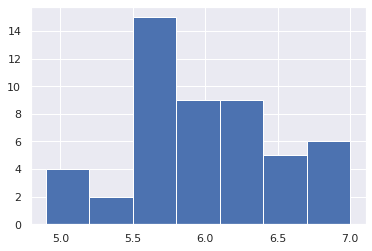

In [0]:
plt.hist(versicolor_petal_length, bins=n_bins);

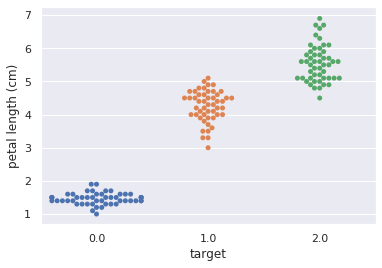

In [0]:
sns.swarmplot(x='target', y='petal length (cm)', data=iris_df);

In [0]:
def ecdf(data):
  """Compute ECDF fro a one-dimensional array of measurements."""
  n = len(data)
  x = np.sort(data)
  y = np.arange(1, n+1) / n
  return x, y


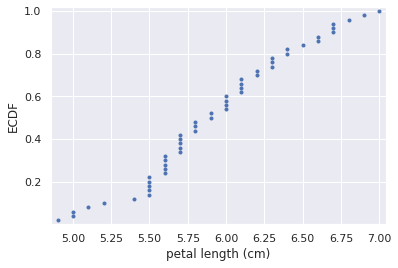

In [0]:
x_vers, y_vers = ecdf(versicolor_petal_length)

plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.margins(0.02)

plt.xlabel('petal length (cm)')
plt.ylabel('ECDF');

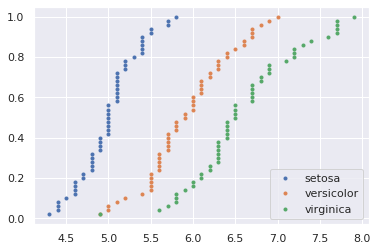

In [0]:
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

plt.plot(x_set, y_set, marker='.', linestyle='none')
plt.plot(x_vers, y_vers, marker='.', linestyle='none')
plt.plot(x_virg, y_virg, marker='.', linestyle='none')

plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right');


In [0]:
mean_length_vers = np.mean(versicolor_petal_length)
print(f'I. versicolor: {mean_length_vers} cm')

I. versicolor: 5.936 cm


In [0]:
percentiles = np.array([2.5, 25, 50, 75, 97.5])
ptiles_vers = np.percentile(versicolor_petal_length, percentiles)

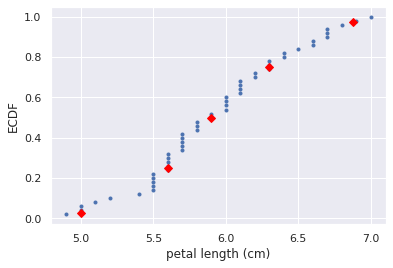

In [0]:
plt.plot(x_vers, y_vers, '.')
plt.xlabel('petal length (cm)')
plt.ylabel('ECDF')
plt.plot(ptiles_vers, percentiles / 100, marker='D', color='red', linestyle='none');

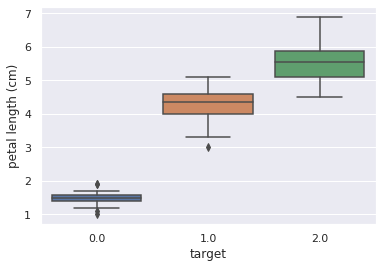

In [0]:
sns.boxplot(x='target', y='petal length (cm)', data=iris_df);

## Computing variance

In [0]:
differences = versicolor_petal_length - np.mean(versicolor_petal_length)
diff_sq = differences ** 2
variance_explicit = np.mean(diff_sq)
variance_np = np.var(versicolor_petal_length)

variance_explicit, variance_np

(0.261104, 0.261104)

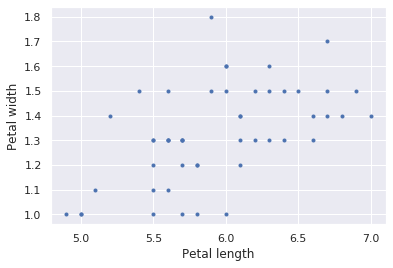

In [0]:
plt.plot(versicolor_petal_length, versicolor_petal_width, marker='.', linestyle='none')
plt.xlabel('Petal length')
plt.ylabel('Petal width');

In [0]:
covariance_matrix = np.cov(versicolor_petal_length, versicolor_petal_width)
print(covariance_matrix)

petal_cov = covariance_matrix[0,1]
print(petal_cov)

[[0.26643265 0.05577959]
 [0.05577959 0.03910612]]
0.05577959183673469


In [0]:
def pearson(x, y):
  corr_mat = np.corrcoef(x, y)
  return corr_mat[0, 1]

r = pearson(versicolor_petal_length, versicolor_petal_width)

print(r)

0.5464610715986299


## Thinking probabilistically-- Continuous variables

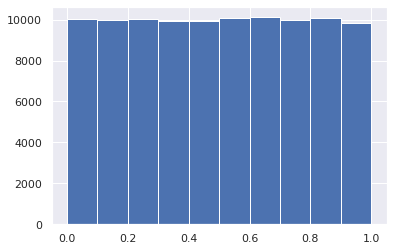

In [0]:
np.random.seed(42)

sim_size = 100000

random_numbers = np.empty(sim_size)
for i in range(sim_size):
  random_numbers[i] = np.random.random()

plt.hist(random_numbers);

In [0]:
def perform_bernoulli_trials(n, p):
  n_success = 0
  trials = np.random.random(n)
  success = trials < p
  return success.sum()


In [0]:
perform_bernoulli_trials(3, 0.5)

1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0, 0.5, 'probability')

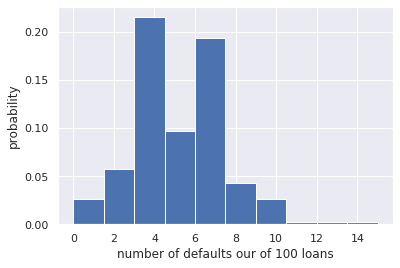

In [0]:
np.random.seed(42)
n_defaults = np.array([perform_bernoulli_trials(100, 0.05) for _ in range(1000)])
plt.hist(n_defaults, normed=True)
plt.xlabel('number of defaults our of 100 loans')
plt.ylabel('probability')

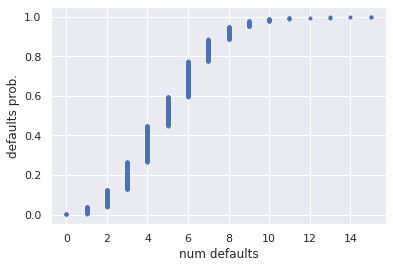

In [0]:
x, y = ecdf(n_defaults)
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('num defaults')
plt.ylabel('defaults prob.');

In [0]:
np.sum(n_defaults >= 10) / len(n_defaults)


0.022

In [0]:
np.random.binomial(4, 0.5, size=10)

array([2, 2, 2, 2, 2, 2, 3, 3, 2, 2])

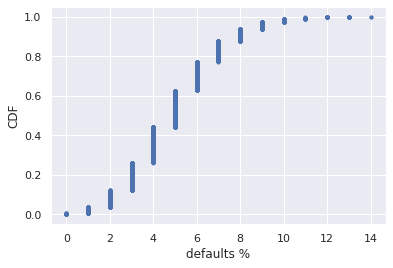

In [0]:
np.random.seed(42)

n_defaults = np.random.binomial(n=100, p=0.05, size=10000)
x, y = ecdf(n_defaults)

plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('defaults %')
plt.ylabel('CDF');

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


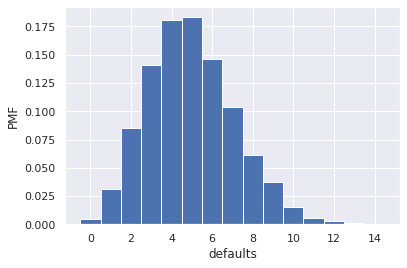

In [0]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
plt.hist(n_defaults, normed=True, bins=bins)
plt.xlabel('defaults')
plt.ylabel('PMF');

In [0]:
samples_poisson = np.random.poisson(10, 1000)
np.sort(np.unique(samples_poisson))

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 22])

In [0]:
stats.describe(samples_poisson)

DescribeResult(nobs=1000, minmax=(3, 22), mean=9.996, variance=10.29628028028028, skewness=0.34700785112511734, kurtosis=0.07712341949064827)

In [0]:
n = [20, 100, 1000]
p = [0.5, 0.1, 0.01]
for i in range(3):
  samples_binomial = np.random.binomial(n[i], p[i], 10000)
  print('n =', n[i], 'Binom:', np.mean(samples_binomial),
                                 np.std(samples_binomial))

n = 20 Binom: 10.0 2.2187383802512635
n = 100 Binom: 9.9896 3.002614167687883
n = 1000 Binom: 9.966 3.1473868526128146


Was 2015 anomalous?
1990 and 2015 featured the most no-hitters of any season of baseball (there were seven). Given that there are on average 251/115 no-hitters per season, what is the probability of having seven or more in a season?

In [0]:
n_nohitters = np.random.poisson(251/115, size=10000)
n_large = np.sum(n_nohitters >= 7)
print(f'n_large: {n_large}')
p_large = n_large / 10000
print('Probability of seven or more no-hitters:', p_large, p_large * 100)


n_large: 68
Probability of seven or more no-hitters: 0.0068 0.6799999999999999


In [0]:
samples_std1 = np.random.normal(20, 1, 100000)
samples_std3 = np.random.normal(20, 3, 100000)
samples_std10 = np.random.normal(20, 10, 100000)

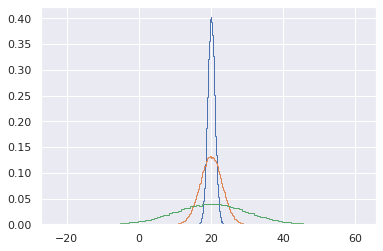

In [0]:
plt.hist(samples_std1, bins=100, density=True, histtype='step')
plt.hist(samples_std3, bins=100, density=True, histtype='step')
plt.hist(samples_std10, bins=100, density=True, histtype='step');

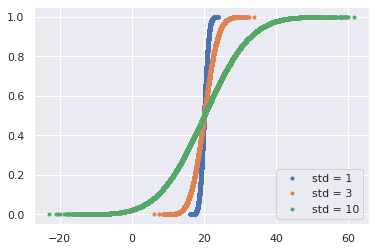

In [0]:
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

plt.plot(x_std1, y_std1, marker='.', linestyle='none');
plt.plot(x_std3, y_std3, marker='.', linestyle='none');
plt.plot(x_std10, y_std10, marker='.', linestyle='none')

plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show();
